# Tutorial 04 - Edges
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schedldave/cv2021/blob/main/04_Edges.ipynb)
## Dr. David C. Schedl

Note: this tutorial is geared towards students **experienced in programming** and aims to introduce you to **Computer Vision** techniques.


Useful links:
* OpenCV Tutorials: https://docs.opencv.org/master/d9/df8/tutorial_root.html
* Image Processing in Pyhton: https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb



# Contents

This notebook covers topics such as Filters, Fourier Transformation and Interpolation

Table of Contents  
- [Filters in OpenCV](#Filters)
    - Average Filter
    - Gaussian Filter
    - Border Handling
- [Fourier Transformation](#Fourier_Spectrum)
    - FFT of Images
    - Inverse FFT
    - Convolution Theorem

# Initilization

As always let's import useful libraries, first.

In [6]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt

We will work with images today. So let's download some with `curl` (the same sources as in `02_OpenCV.ipynb`).

In [51]:
!curl -o "cat.jpg" "https://placekitten.com/256/256"
!curl -o "gogh.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Vincent_van_Gogh_-_National_Gallery_of_Art.JPG/367px-Vincent_van_Gogh_-_National_Gallery_of_Art.JPG"
!curl -o "einstein.jpg" "https://www.cns.nyu.edu/~lcv/ssim/index_files/image003.jpg"
# !curl -o "woman.jpg" "https://live.staticflickr.com/8859/18045025168_3a1ffa6521_w_d.jpg"
!curl -o "woman.jpg""https://live.staticflickr.com/8859/18045025168_3a1ffa6521_c_d.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8191    0  8191    0     0   133k      0 --:--:-- --:--:-- --:--:--  133k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84904  100 84904    0     0  2591k      0 --:--:-- --:--:-- --:--:-- 2591k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16025  100 16025    0     0   109k      0 --:--:-- --:--:-- --:--:--  109k
curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information


Let's define utility functions to display images, in Jupyter Notebooks. OpenCV's `imshow` does not work and matplotlib's `imshow` needs special treatment due to color channel handling (RGB vs. BGR)

In [8]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      """A replacement for cv2.imshow() for use in Jupyter notebooks.

        Args:
          img : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
      """
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

def imshow(image, *args, **kwargs):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using matplotlib.

        Args:
          image : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. 
    """
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    # plt.show()

Running on CoLab


# Practice with linear filters

Image filters in OpenCV are applied with `cv2.filter2D(img,-1,kernel)`, where the image and the kernel are numpy arrays.


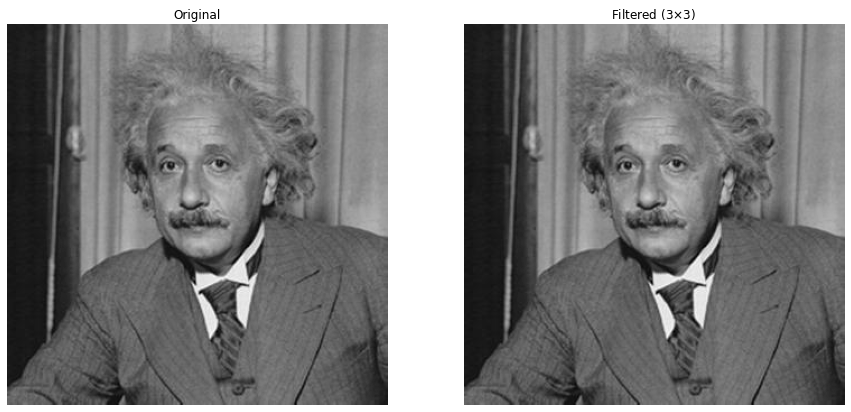

In [9]:
img = cv2.imread('einstein.jpg')[:,:,1].astype(np.float32)

# define your costum kernel below
kernel = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]])
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(15,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),imshow((dst), cmap='gray'),plt.title(r'Filtered ({}$\times${})'.format(*kernel.shape[:2]))
plt.show()

# Canny Edge Detection

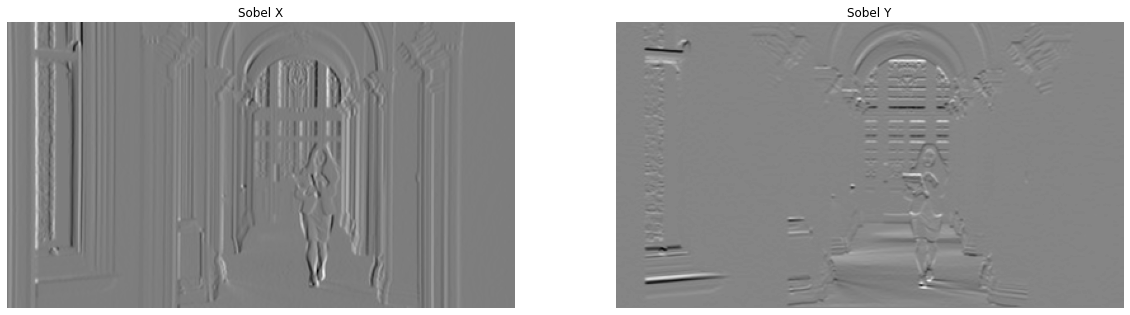

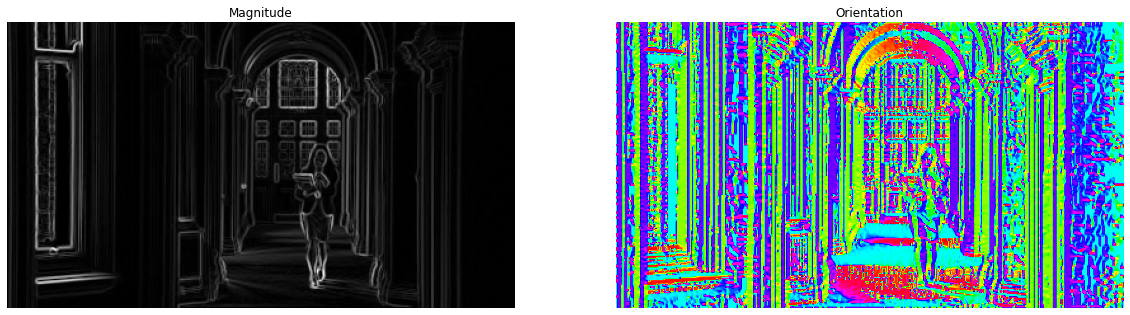

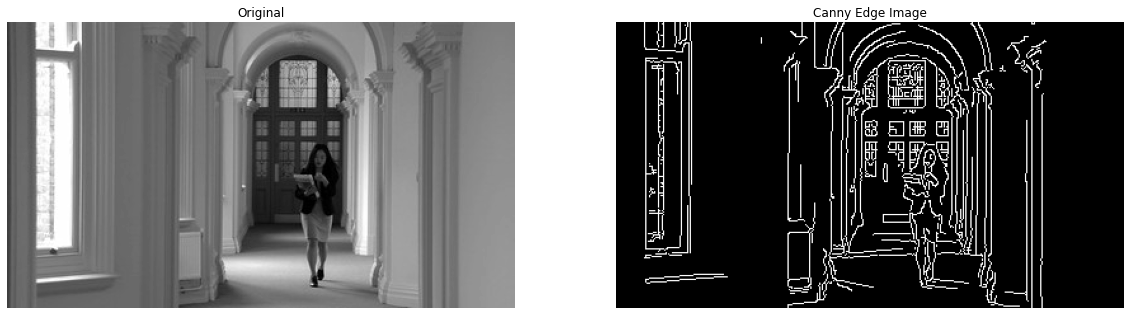

In [69]:
img = cv2.imread('woman.jpg',0)

gsize = (15,15)
#img = cv2.GaussianBlur(img, gsize, 3)

ksize = 3
#edges = cv2.Canny(img,100,200,apertureSize=ksize)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=ksize)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=ksize)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1),imshow(sobelx,cmap = 'gray'), plt.title('Sobel X')
plt.subplot(1,2,2),imshow(sobely,cmap = 'gray'), plt.title('Sobel Y')
plt.show()

mag = np.sqrt( sobelx**2 + sobely**2 )
theta = np.arctan2(sobelx, sobely)

plt.figure(figsize=(20,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(mag,cmap = 'gray'), plt.title('Magnitude')
plt.subplot(122), imshow(theta,cmap='hsv'), plt.title('Orientation')
plt.show()

edges = cv2.Canny(sobelx.astype(np.int16), sobely.astype(np.int16), 0.1*np.amax(mag),0.2*np.amax(mag))

plt.figure(figsize=(20,10)) # this command makes the figure larger so we see the filter results clearer
plt.subplot(121),imshow(img,cmap = 'gray'), plt.title('Original')
plt.subplot(122), imshow(edges,cmap = 'gray'), plt.title('Canny Edge Image')
plt.show()